# TUGAS ASSIGNMENT PYTHON 2
### NAMA : JONATHAN ADIWINATA
### KODE PESERTA : PYTN-KS12-013
### UNIVERSITAS LAMBUNG MANGKURAT

In [1]:
#Install dan import libraries yang digunakan
import numpy as np
import statistics
import math
import scipy.stats
import pandas as pd

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Hipotesis:

Apakah ada perbedaan unit yang terjual berdasarkan kategori bangunan dari tahun 1900 hingga seterusnya?

In [2]:
# Mengimport data
# Data ini merupakan data catatan setiap bangunan atau unit bangunan yang dijual dipasar properti New York City
data = pd.read_csv('C:/Kuliah/Studi Independen/nyc-rolling-sales.csv')
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
# Melakukan drop pada kolom data yang tidak digunakan dan data yang kosong 
data.drop(['Unnamed: 0','EASE-MENT'], axis = 1, inplace=True)
data

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


# Pre Processing

In [4]:
# Menghitung data yang memiliki duplicate atau data yang sama
sum(data.duplicated(data.columns))

765

In [5]:
# Melakukan penghapusan pada data yang duplicat dan mengecek kembali data apakah masih ada data yang berduplikat
data = data.drop_duplicates(data.columns, keep='last')
sum(data.duplicated(data.columns))

0

In [6]:
# Menampilkan dimensi data
data.shape

(83783, 20)

In [7]:
# Deskripsi variabel dan tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         83783 non-null  int64 
 1   NEIGHBORHOOD                    83783 non-null  object
 2   BUILDING CLASS CATEGORY         83783 non-null  object
 3   TAX CLASS AT PRESENT            83783 non-null  object
 4   BLOCK                           83783 non-null  int64 
 5   LOT                             83783 non-null  int64 
 6   BUILDING CLASS AT PRESENT       83783 non-null  object
 7   ADDRESS                         83783 non-null  object
 8   APARTMENT NUMBER                83783 non-null  object
 9   ZIP CODE                        83783 non-null  int64 
 10  RESIDENTIAL UNITS               83783 non-null  int64 
 11  COMMERCIAL UNITS                83783 non-null  int64 
 12  TOTAL UNITS                     83783 non-null

In [8]:
# Melakukan perubahan tipe data pada kolom data menjadi kategori dan perubahan tipe data yang seharusnya numeric
# Mengubah data objek menjadi data numeric pada kolom land square feet, gross square feet dan sale price
# coerce untuk melakukan perubahan pada data yang memiliki missing value (~) menjadi NaN
data['TAX CLASS AT TIME OF SALE'] = data['TAX CLASS AT TIME OF SALE'].astype("category")
data['TAX CLASS AT PRESENT'] = data['TAX CLASS AT PRESENT'].astype('category')
data['LAND SQUARE FEET'] = pd.to_numeric(data['LAND SQUARE FEET'], errors='coerce')
data['GROSS SQUARE FEET']= pd.to_numeric(data['GROSS SQUARE FEET'], errors='coerce')
data['SALE PRICE'] = pd.to_numeric(data['SALE PRICE'], errors='coerce')
data['BOROUGH'] = data['BOROUGH'].astype('category')

In [9]:
data

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         83783 non-null  category
 1   NEIGHBORHOOD                    83783 non-null  object  
 2   BUILDING CLASS CATEGORY         83783 non-null  object  
 3   TAX CLASS AT PRESENT            83783 non-null  category
 4   BLOCK                           83783 non-null  int64   
 5   LOT                             83783 non-null  int64   
 6   BUILDING CLASS AT PRESENT       83783 non-null  object  
 7   ADDRESS                         83783 non-null  object  
 8   APARTMENT NUMBER                83783 non-null  object  
 9   ZIP CODE                        83783 non-null  int64   
 10  RESIDENTIAL UNITS               83783 non-null  int64   
 11  COMMERCIAL UNITS                83783 non-null  int64   
 12  TOTAL UNITS       

In [11]:
#Mengecek pada kolom data yang masih memiliki nilai null atau NaN
data.columns[data.isnull().any()]

Index(['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE'], dtype='object')

In [12]:
# Melakukan perubahan pada nilai null atau NaN pada kolom data dengan mengisinya dengan mean pada kolom data
data['GROSS SQUARE FEET']=data['GROSS SQUARE FEET'].fillna(data['GROSS SQUARE FEET'].mean())
data['LAND SQUARE FEET']=data['LAND SQUARE FEET'].fillna(data['LAND SQUARE FEET'].mean())

In [13]:
# Menghilangkan data yang bernilai null atau NaN pada kolom sale price
data2=data[~data['SALE PRICE'].isna()]

In [14]:
data2

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23 00:00:00
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00


In [15]:
# Melakukan delete kolom data yang tidak perlu
del data2['ADDRESS']
del data2['APARTMENT NUMBER']
del data2['SALE DATE']

In [16]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69607 entries, 0 to 84547
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         69607 non-null  category
 1   NEIGHBORHOOD                    69607 non-null  object  
 2   BUILDING CLASS CATEGORY         69607 non-null  object  
 3   TAX CLASS AT PRESENT            69607 non-null  category
 4   BLOCK                           69607 non-null  int64   
 5   LOT                             69607 non-null  int64   
 6   BUILDING CLASS AT PRESENT       69607 non-null  object  
 7   ZIP CODE                        69607 non-null  int64   
 8   RESIDENTIAL UNITS               69607 non-null  int64   
 9   COMMERCIAL UNITS                69607 non-null  int64   
 10  TOTAL UNITS                     69607 non-null  int64   
 11  LAND SQUARE FEET                69607 non-null  float64 
 12  GROSS SQUARE FEET 

In [17]:
# Melakukan pengecekan pada data apakah masih terdapat nilai null value (kosong) pada data
data2.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
dtype: int64

In [18]:
# Melakukan pengecekan pada data apakah masih terdapat nilai null value (kosong) pada data
data2.isnull().any()

BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
TAX CLASS AT PRESENT              False
BLOCK                             False
LOT                               False
BUILDING CLASS AT PRESENT         False
ZIP CODE                          False
RESIDENTIAL UNITS                 False
COMMERCIAL UNITS                  False
TOTAL UNITS                       False
LAND SQUARE FEET                  False
GROSS SQUARE FEET                 False
YEAR BUILT                        False
TAX CLASS AT TIME OF SALE         False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
dtype: bool

In [19]:
# Mengubah pada kolom borough dari angka menjadi nama tempat berdasarkan angka tersebut
data2['BOROUGH'] = data2['BOROUGH'].astype(str)
data2['BOROUGH'] = data2['BOROUGH'].str.replace("1", "Manhattan")
data2['BOROUGH'] = data2['BOROUGH'].str.replace("2", "Bronx")
data2['BOROUGH'] = data2['BOROUGH'].str.replace("3", "Brooklyn")
data2['BOROUGH'] = data2['BOROUGH'].str.replace("4", "Queens")
data2['BOROUGH'] = data2['BOROUGH'].str.replace("5", "Staten Island")

In [20]:
# Mengambil data dengan hanya pada tahun dibuat lebih dari sama dengan 1900 berdasarkan hipotesis serta untuk menghilangkan data yang bernilai 0 pada kolom tersebut
data3 = data2[data2['YEAR BUILT']>= 1900]
data3

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0


In [21]:
# Mengambil data pada kolom gross and land square feet dengan kurang dari 10000 agar data lebih sedikit dan mengurangi outlier agar menyeimbangkan data
data4 = data3[data3['GROSS SQUARE FEET'] < 10000]
data4 = data3[data3['LAND SQUARE FEET'] < 10000]
data4

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84537,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7267,249,B2,10309,2,0,2,4350.0,2840.0,1996,1,B2,625000.0
84540,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,93,B2,10309,2,0,2,3325.0,1300.0,1995,1,B2,509000.0
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0


In [22]:
# Mengecek data pada kolom total unit yang memiliki nilai 0 
data4[["TOTAL UNITS", "SALE PRICE"]].groupby(['TOTAL UNITS'], as_index=False).count().sort_values(by='SALE PRICE', ascending=False)

,TOTAL UNITS,SALE PRICE
1,1,26359
0,0,15376
2,2,12044
3,3,3938
4,4,1213
...,...,...
53,55,1
51,53,1
49,49,1
46,46,1


Pada kolom total unit menujukkan ada nya nilai 0 yang berarti tidak terdapat unit yang terjual baik dari residental unit maupun comercial sehingga ini merupakan data yang kurang jelas dan kosong sehingga perlu dihilangkan

In [23]:
# Mengambil data pada kolom total unit dengan lebih dari 0 dan kurang dari 2261 unit agar data lebih sedikit dan mengurangi outlier karena terdapat data yang memiliki nilai yang cukup besar dibanding nilai yang lain
data5 = data4[(data4['TOTAL UNITS'] > 0) & (data4['TOTAL UNITS'] != 2261)] 
data5

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84537,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7267,249,B2,10309,2,0,2,4350.0,2840.0,1996,1,B2,625000.0
84540,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,93,B2,10309,2,0,2,3325.0,1300.0,1995,1,B2,509000.0
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0


In [24]:
# Mengambil data pada kolom sale price dengan nilai penjualan lebih dari 100 dan kurang dari 5 juta agar data lebih seimbang dan mengurangi outlier karena terdapat data yang memiliki nilai yang cukup besar dibanding nilai yang lain
data6 = data5[(data5['SALE PRICE'] > 100) & (data5['SALE PRICE'] <5000000)] 
data6

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009,10,0,10,2272.000000,6794.000000,1913,2,C4,3936272.0
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,10009,8,0,8,1750.000000,4226.000000,1920,2,C4,3192840.0
79,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1003,R4,10009,1,0,1,3854.481179,3894.415813,1920,2,R4,762669.0
80,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1004,R4,10009,1,0,1,3854.481179,3894.415813,1920,2,R4,772851.0
81,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1005,R4,10009,1,0,1,3854.481179,3894.415813,1920,2,R4,1034880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84537,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7267,249,B2,10309,2,0,2,4350.000000,2840.000000,1996,1,B2,625000.0
84540,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,93,B2,10309,2,0,2,3325.000000,1300.000000,1995,1,B2,509000.0
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,10309,2,0,2,2400.000000,2575.000000,1998,1,B9,450000.0
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,10309,2,0,2,2498.000000,2377.000000,1998,1,B9,550000.0


In [25]:
# Mengubah nama kolom data menjadi huruf kecil
data6.columns= data6.columns.str.lower()
data6.columns

Index(['borough', 'neighborhood', 'building class category',
       'tax class at present', 'block', 'lot', 'building class at present',
       'zip code', 'residential units', 'commercial units', 'total units',
       'land square feet', 'gross square feet', 'year built',
       'tax class at time of sale', 'building class at time of sale',
       'sale price'],
      dtype='object')

In [26]:
# Mengganti spasi pada kolom data menjadi underscore symbol agar lebih mudah diakses
data6.columns =data6.columns.str.replace(' ', '_')
data6

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009,10,0,10,2272.000000,6794.000000,1913,2,C4,3936272.0
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,10009,8,0,8,1750.000000,4226.000000,1920,2,C4,3192840.0
79,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1003,R4,10009,1,0,1,3854.481179,3894.415813,1920,2,R4,762669.0
80,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1004,R4,10009,1,0,1,3854.481179,3894.415813,1920,2,R4,772851.0
81,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1005,R4,10009,1,0,1,3854.481179,3894.415813,1920,2,R4,1034880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84537,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7267,249,B2,10309,2,0,2,4350.000000,2840.000000,1996,1,B2,625000.0
84540,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,93,B2,10309,2,0,2,3325.000000,1300.000000,1995,1,B2,509000.0
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,10309,2,0,2,2400.000000,2575.000000,1998,1,B9,450000.0
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,10309,2,0,2,2498.000000,2377.000000,1998,1,B9,550000.0


# Descriptive & Inferential Statistics
akan menggunakan data pada kolom sale price karena lebih cocok untuk digunakan

# Measure of Central Tendency: Mean

In [27]:
np.mean(data6['sale_price'])

884604.5947599229

In [28]:
data6['sale_price'].mean()

884604.5947599229

Rata - rata dari data sale price adalah sebesar 884604.5947599229

In [29]:
scipy.stats.gmean(data6['sale_price'], axis=0)

647804.7040037547

Geometric Mean dari data sale price adalah sebesar 647804.7040037547

In [30]:
scipy.stats.hmean(data6['sale_price'], axis=0)

119896.0990703584

Harmonic Mean dari data sale price adalah sebesar 119896.0990703584

In [31]:
# Descriptive dari data sale price
scipy.stats.describe(data6['sale_price'])

DescribeResult(nobs=35801, minmax=(200.0, 4996841.0), mean=884604.5947599229, variance=581985638777.9741, skewness=2.418391401831472, kurtosis=6.883480061501032)

# Measure of Central Tendency: Median

In [32]:
data6['sale_price'].median()

657522.0

Median dari data sale price adalah sebesar 657522.0

# Measure of Central Tendency: Modus

In [33]:
statistics.mode(data6['sale_price'])

600000.0

Modus dari data sale price adalah sebesar 600000

# Measure of Spread : Range

In [34]:
Range = np.max(data6['sale_price']) - np.min(data6['sale_price'])
Range

4996641.0

In [35]:
Range = data6['sale_price'].max() - data6['sale_price'].min()

In [36]:
np.ptp(data6['sale_price'])

4996641.0

Range dari data sale price adalah sebesar 4996641

In [37]:
Q1 = np.quantile(data6['sale_price'],0.25)# Persentil ke-25
Q3 = np.quantile(data6['sale_price'],0.75)# Persentil ke-75

print("IQR: ", Q3-Q1)

IQR:  550000.0


Interquartile Range dari data sale price dengan selisih antara persentil ke-75 (kuartil atas) dan persentil ke-25 (kuartil bawah) adalah sebesar 550000

In [38]:
np.quantile(data6['sale_price'],0.975) - np.quantile(data6['sale_price'],0.025)

3200000.0

Range dari data sale price dengan selisih antara persentil ke-97,5 (kuartil atas) dan persentil ke-2,5 (kuartil bawah) adalah sebesar 3200000

# Measure of Spread : Standard Deviation

In [39]:
data6['sale_price'].std(ddof=1)

762879.8324624625

In [40]:
data6['sale_price'].var(ddof=1)**0.5

762879.8324624625

Nilai Standar Deviation dari data sale price adalah sebesar 762879.8324624625

## Measure of Spread : Variance

In [41]:
data6['sale_price'].var(ddof=1)

581985638777.9548

Nilai Variance dari data sale price adalah sebesar 581985638777.9548

# Probability Distribution

<AxesSubplot:xlabel='sale_price', ylabel='Density'>

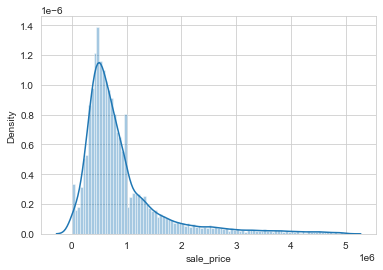

In [42]:
import matplotlib.ticker as ticker
sns.set_style("whitegrid")
sns.distplot((data6['sale_price']), kde=True, bins=100)

Dari gambaran plot diatas tampak bahwa data sale price terdistribusi secara normal dan lebih miring ke arah kanan

# Confidence Interval

In [67]:
#Mengambil angka acak mengikuti distribusi normal
data_normal = scipy.stats.norm.rvs(data6['sale_price'])
data_normal

array([3936271.01516008, 3192839.29951712,  762668.63106773, ...,
        449999.95718246,  549999.23662111,  460001.71117253])

In [68]:
means_of_means = []
for experiment in range(10000):
   resampled = np.random.choice(data_normal,size= len(data_normal), replace=True)
   means_of_means.append(np.mean(resampled))

In [50]:
means_of_means

[879235.8266535455,
 881354.0714953804,
 879973.5370814273,
 888277.9360050191,
 888739.9429010268,
 879255.5191785671,
 885205.0947475156,
 883815.6834927304,
 884955.177236347,
 877480.7616953797,
 880575.4600188208,
 885721.5147494365,
 881316.4700615788,
 876929.9032217106,
 885263.3189506363,
 883560.7507235991,
 885728.2386061456,
 885772.6253755032,
 882853.6212686622,
 887581.9815336814,
 877556.8529873727,
 874661.4228908023,
 881022.3247778601,
 885784.9947060674,
 882503.5094628272,
 878841.0938453629,
 892408.850768833,
 885136.7732308321,
 882367.6035405446,
 887310.5528146249,
 892942.6452804732,
 888527.468224489,
 884142.3911928596,
 882610.629541285,
 880613.2176970438,
 880172.4627959734,
 882923.5892921566,
 883700.9868690214,
 893036.5379164893,
 889655.2650431641,
 884685.1335284995,
 882339.8634995746,
 887397.7960096098,
 882526.3803021825,
 891843.7679919476,
 883572.0207610689,
 893374.5500825555,
 887835.1074926135,
 894770.7322630817,
 883880.8161411856,
 874

In [51]:
len(means_of_means)

10000

In [73]:
np.mean(means_of_means)

884618.2561359693

Nilai rata-rata dari data population mean adalah sebesar 884669.6029381073

In [77]:
lower_bound = np.quantile(means_of_means, 0.025)
upper_bound = np.quantile(means_of_means, 0.975)

In [78]:
print("95% CI of Population Mean: ({}, {})".format(lower_bound, upper_bound))

95% CI of Population Mean: (876710.0062572092, 892707.7273094051)


95% CI of Population Mean adalah antara batas bawah 876710.0062572092 dan batas atas 892707.7273094051

In [79]:
np.std(means_of_means)

4062.4813737716254

Nilai Standard Deviasi dari data population mean adalah sebesar 4062.4813737716254

In [80]:
lower_bound = np.mean(means_of_means) - np.std(means_of_means)*1.96
upper_bound = np.mean(means_of_means) + np.std(means_of_means)*1.96
print("95% CI of Population Mean: ({}, {})".format(lower_bound, upper_bound))

95% CI of Population Mean: (876655.792643377, 892580.7196285616)


95% CI of Population Mean adalah antara batas bawah 876655.792643377 dan batas atas 892580.7196285616

In [85]:
def standard_error_of_mean(data):
    s = np.std(data)
    nobs = len(data)
    return s/(nobs**0.5)

In [86]:
se = standard_error_of_mean(data_normal)
m = np.mean(data_normal)

In [87]:
lower_bound = m - se*1.96
upper_bound = m + se*1.96
print("95% CI of Population Mean: ({}, {})".format(lower_bound, upper_bound))

95% CI of Population Mean: (876702.2077109634, 892506.9913613899)


In [88]:
scipy.stats.norm.interval(alpha=0.95,
                          loc=np.mean(data_normal),
                          scale=scipy.stats.sem(data_normal))

(876702.2425534655, 892506.9565188878)

# Hypothesis Testing with T-Test

1. Variable a : Jumlah unit yang terjual
2. Variable b : Tahun unit dibuat

H0: variable a  tidak ada hubungan dengan variable b

H1: ada hubungan antara dua variable

In [90]:
scipy.stats.ttest_ind(a=data6['total_units'],
                       b=data6['year_built'],
                       alternative='two-sided')

Ttest_indResult(statistic=-10064.242928869284, pvalue=0.0)

In [91]:
p = scipy.stats.ttest_ind(a=data6['total_units'],b=data6['year_built'], alternative='two-sided').pvalue

if p > 0.05:
    print("Probably From same distribution")
else:
    print("Probably diffrent distribution")


Probably diffrent distribution


Berdasarkan hasil t test diatas didapat bahwa nilai p value sebesar 0.0 atau kurang dari 0.05 sehingga artinya tidak ada hubungan antara dua variable, tahun unit bangunan dibuat dan jumlah unit yang terjual sehingga artinya H1 ditolak atau gagal tolak H0

In [101]:
# Membuat pivot table dengan kolom data kategori bangunan dan harga jual untuk menjawab pertanyaan diatas
pivot=data6.pivot_table(index='building_class_category', values='sale_price', aggfunc=np.median).sort_values(by='sale_price')
pivot

,sale_price
building_class_category,
47 CONDO NON-BUSINESS STORAGE,14000.0
49 CONDO WAREHOUSES/FACTORY/INDUS,15000.0
44 CONDO PARKING,50100.0
09 COOPS - WALKUP APARTMENTS,71104.0
45 CONDO HOTELS,71837.0
48 CONDO TERRACES/GARDENS/CABANAS,71944.0
26 OTHER HOTELS,74700.0
10 COOPS - ELEVATOR APARTMENTS,289000.0
06 TAX CLASS 1 - OTHER,356500.0


# Kesimpulan 

Maka untuk menjawab pertanyaan diatas apakah ada perbedaan unit terjual berdasarkan kategory bangunan, yaitu perbedaannya dapat dilihat dari harga terjualnya yaitu untuk harga jual termahal oleh unit kategori bangunan nomer 8 : RENTALS - ELEVATOR APARTMENTS senilai 3925000 dan untuk harga jual termahal oleh unit kategori bangunan nomer 47 : CONDO NON-BUSINESS STORAGE senilai 14000 